In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 13.3 MB/s eta 0:00:00


In [10]:
from ultralytics import YOLO
import cv2
import numpy as np

# YOLO 모델 로드
model = YOLO("yolov8s.pt")
# 이미지 로드
image_path = "/content/test2/002.jpg"
image = cv2.imread(image_path)

#orignal
result = model.predict(image_path, save=True, conf=0.5)
orignal = result[0].plot()
cv2.imwrite("original.png",orignal)

# Upscaling
scale_factor = 2
width = int(image.shape[1] * scale_factor)
height = int(image.shape[0] * scale_factor)
upscaled_img = cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)
result = model.predict(upscaled_img, save=True, conf=0.5)
only_upscaled = result[0].plot()

cv2.imwrite("upscaling.png",only_upscaled)


# Denoising
denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
result = model.predict(denoised_image, save=True, conf=0.5)
denoising = result[0].plot()

cv2.imwrite("denoising.png",denoising)

# Sharpening
mask = np.asarray([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]], dtype = np.float32)
sharpening_img = cv2.filter2D(image, -1, mask)
result = model.predict(sharpening_img, save=True, conf=0.5)
sharpening_img = result[0].plot()

cv2.imwrite("sharpening_img.png",sharpening_img)


image 1/1 /content/test2/002.jpg: 640x640 8 cars, 584.9ms
Speed: 3.7ms preprocess, 584.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5

0: 640x640 8 cars, 568.4ms
Speed: 6.4ms preprocess, 568.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5

0: 640x640 8 cars, 537.2ms
Speed: 5.1ms preprocess, 537.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5

0: 640x640 5 cars, 554.8ms
Speed: 5.7ms preprocess, 554.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


True


0: 640x640 8 cars, 885.8ms
Speed: 8.6ms preprocess, 885.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 cars, 879.0ms
Speed: 8.0ms preprocess, 879.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 cars, 916.5ms
Speed: 8.8ms preprocess, 916.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 cars, 795.0ms
Speed: 9.1ms preprocess, 795.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
  Description  Processing Time (s)  Detected Objects
0    Original             0.910283                 8
1    Upscaled             0.897763                 8
2    Denoised             0.939744                 8
3   Sharpened             0.817011                 3


<Figure size 640x480 with 0 Axes>

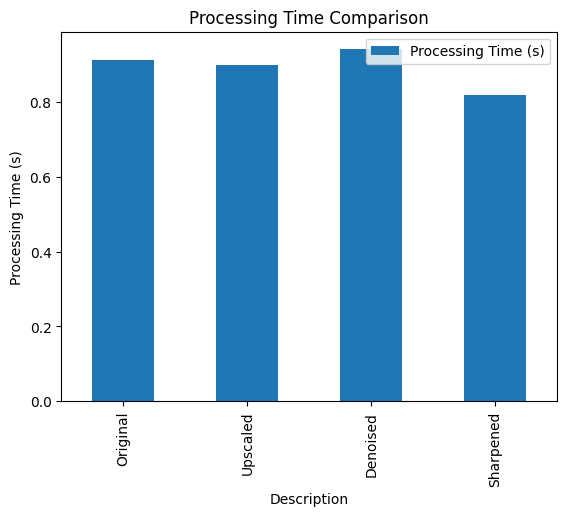

<Figure size 640x480 with 0 Axes>

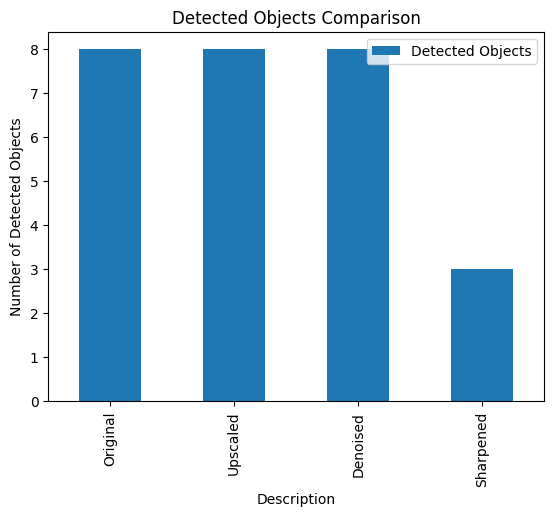

In [11]:
import time
import psutil
import pandas as pd
import matplotlib.pyplot as plt

# 성능 데이터 저장용 리스트
performance_data = []

def measure_performance(image, description):
    """
    YOLO 모델 성능 측정을 위한 함수.
    image: 처리할 이미지
    description: 처리된 이미지의 설명 (Original, Upscaled, Denoised 등)
    """
    # 시간 측정 시작
    start_time = time.time()

    # YOLO 예측
    result = model.predict(image, save=False, conf=0.5)
    end_time = time.time()

    # 처리 시간 측정
    processing_time = end_time - start_time

    # 예측된 객체의 개수 (정확도를 간단히 비교할 기준으로 활용)
    detected_objects = len(result[0].boxes)

    # 성능 데이터 저장
    performance_data.append({
        "Description": description,
        "Processing Time (s)": processing_time,
        "Detected Objects": detected_objects
    })

# Original Image 성능 측정
measure_performance(image, "Original")

# Upscaled Image 성능 측정
measure_performance(upscaled_img, "Upscaled")

# Denoised Image 성능 측정
measure_performance(denoised_image, "Denoised")

# Sharpened Image 성능 측정
measure_performance(sharpening_img, "Sharpened")

# 성능 데이터를 데이터프레임으로 변환
df = pd.DataFrame(performance_data)

# 결과 출력
print(df)

# 성능 지표 시각화
# 처리 시간 그래프
plt.figure()
df.plot(x="Description", y="Processing Time (s)", kind="bar", title="Processing Time Comparison")
plt.ylabel("Processing Time (s)")
plt.show()

# 탐지된 객체 수 그래프
plt.figure()
df.plot(x="Description", y="Detected Objects", kind="bar", title="Detected Objects Comparison")
plt.ylabel("Number of Detected Objects")
plt.show()
